**Jiahao (Derek) Ye**

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA` object called `pca` based on the DataFrame object that you just created.

In [2]:
iris_data = pd.read_csv('data/iris.csv')
print(iris_data.head(5))

pca = pca_cov.PCA_COV(iris_data)

   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [320]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Tes `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [321]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [322]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [323]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.545

In [324]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315428, 0.9588784639918413, 0.993614078079774, 0.9999999999999999]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

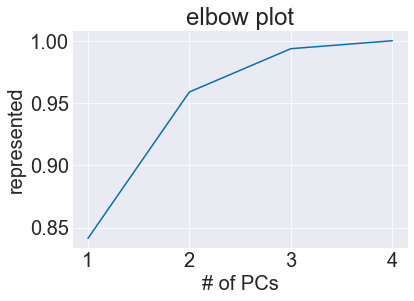

In [325]:
# test elbow plot
pca.elbow_plot()
plt.title('elbow plot')
plt.xlabel('# of PCs')
plt.ylabel('represented')
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Question 1 answer:**
I would drop 2 principle components, because
- #PC=2 already represents >95% of the data
- after 2 PCs, the increase in the proportion represented gets smaller, meanining the rest are less significant.

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [326]:
pcs_to_keep = [0, 1]
projected = pca.pca_project(pcs_to_keep)

##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

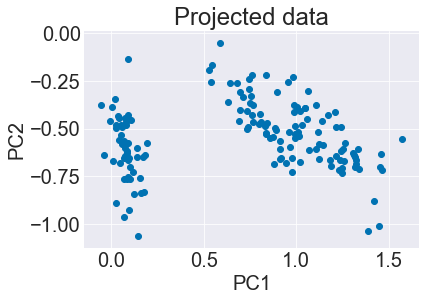

In [327]:
x = projected[:,0]
y = projected[:,1]
plt.title('Projected data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x,y)
plt.show()

### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC0)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

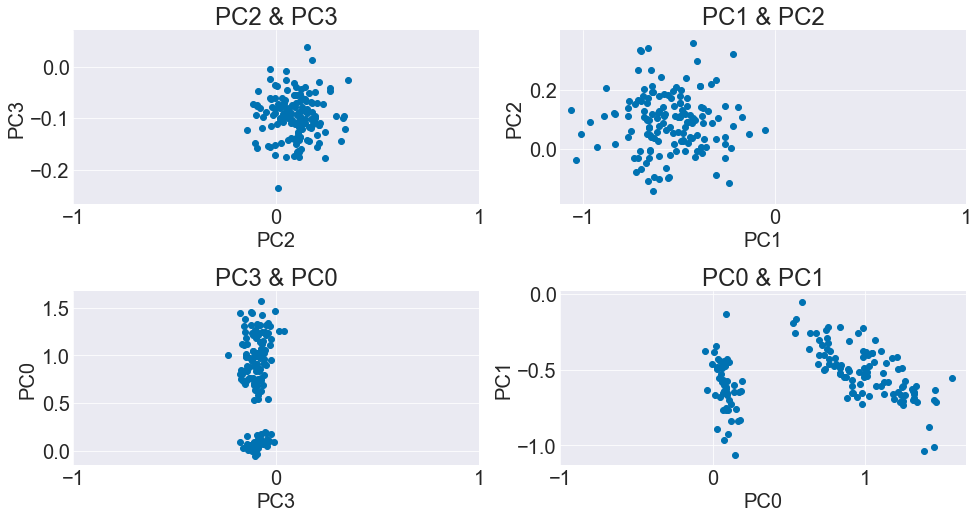

In [328]:
plt.figure(figsize = (16,8))
plt.subplots_adjust(hspace = 0.5)

plt.subplot(2,2,1)
projected = pca.pca_project([2,3])
plt.scatter(projected[:,0],projected[:,1])
plt.xticks(np.arange(-1, 2))
plt.title('PC2 & PC3')
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.subplot(2,2,2)
projected = pca.pca_project([1,2])
plt.scatter(projected[:,0],projected[:,1])
plt.xticks(np.arange(-1, 2))
plt.title('PC1 & PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2,2,3)
projected = pca.pca_project([3,0])
plt.scatter(projected[:,0],projected[:,1])
plt.xticks(np.arange(-1, 2))
plt.title('PC3 & PC0')
plt.xlabel('PC3')
plt.ylabel('PC0')

plt.subplot(2,2,4)
projected = pca.pca_project([0,1])
plt.scatter(projected[:,0],projected[:,1])
plt.xticks(np.arange(-1, 2))
plt.title('PC0 & PC1')
plt.xlabel('PC0')
plt.ylabel('PC1')

plt.show()

**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:**
- In the top-left graph, the data has greater variance on PC2 than on PC3, meaning PC2 accounts for more variance than PC3 does;
- In the top-right graph, the data has greater variance on PC1 than on PC2, meaning PC1 accounts for more variance than PC2 does;
- In the bottom-left graph, the data has greater variance on PC0 than on PC3, meaning PC0 accounts for more variance than PC3 does;
- In the bottom-right graph, the data has greater variance on PC0 than on PC1, meaning PC0 accounts for more variance than PC1 does
- Overall, the bottom-right graph is more discrete than all the other graphs here, meaning PC0 and PC1 spans over greater data points (variance).

### 1d) Loading plot (or heatmap for sections A/C)

Visualize how the top two principal components relate to original data variables.

- Implement `loading_plot` (or heatmap for sections A/C) in `pca_cov.py`

#### Test `loading_plot` (or heatmap for sections A/C)

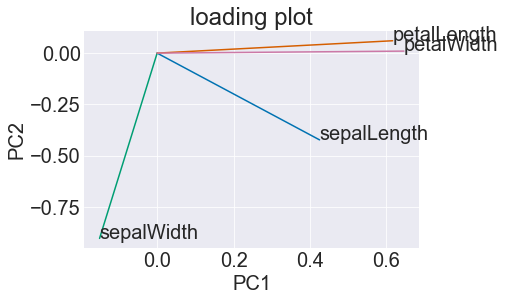

In [329]:
pca.loading_plot()
plt.title('loading plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Question 3:** What do the loadings (or heatmap for sections A/C) tell us what the first two PCs measure, with respect to the original data axes?

**Question 3 answer:** 
- PC1 is positively associated with petalLength, petalWidth, sepaLength.
- PC2 is negatively associated with sepalWidth

**Question 4:** What do the loadings (or heatmap for sections A/C) tell us about correlations among the original data axes?

**Question 4 answer:** 
- sepalLength and sepalWidth are not correlated
- petalWidth and petalLength are positively correlated

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables 'sepalLength', 'sepalWidth' of the Iris data **normalized separately**.
- In the 2nd cell below, do PCA on the normalized Iris data and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables ('sepalLength', 'sepalWidth' — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

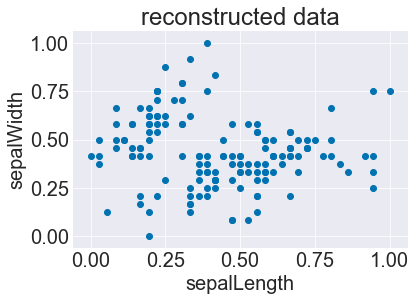

In [279]:
# Plot original iris data normalized
pca.pca(iris_headers, True)
plt.scatter(pca.A[:,0],pca.A[:,1])
plt.title('reconstructed data')
plt.xlabel('sepalLength')
plt.ylabel('sepalWidth')
plt.show()

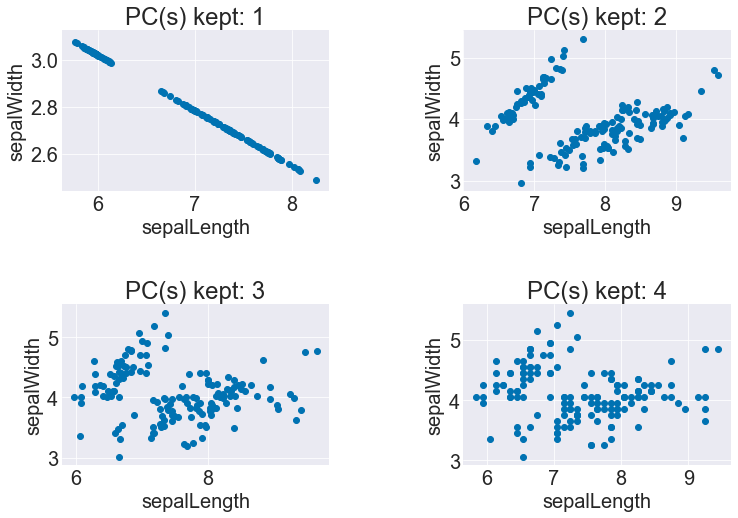

In [331]:
# 2x2 grid of scatter plots

plt.figure(figsize=(12,8))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.xlabel('sepalLength')
    plt.ylabel('sepalWidth')
    plt.title(f"PC(s) kept: {i+1}")
    plt.subplots_adjust(wspace = 0.5, hspace = 0.7)
    Ar = pca.pca_then_project_back(i+1)
    plt.scatter(Ar[:,0], Ar[:,1])
    
plt.show()

**Question 5:** How well does each of the re-projections compress the original data? Briefly interpret what the above 2x2 grid means.

**Question 5 answer:** 
- The top-left graph compresses the original data the most
- Each re-projection is based on the PC(s) kept, i.e., the number of critical dimensions we chose to keep; the less dimensions we chose to keep, the more information of the original data we would've lost, resulting in lossy re-projection (greater extent of compression).
- As the numnber of PCs kept gets larger, the scatter plot looks more similar to the original data plot, but the original data is also less compressed.

## Task 2: PCA on Australia dataset and one other dataset

Do PCA on:
- the Australia dataset
- one other dataet of your choice

In the cells below, include at minimum

- Elbow plot of cumulative variance accounted for by first $k$ principal components.
- Written description of your choice of number of PCs preserved and why.
- Visualization (plot) of PCA projected data on 1st two PCs.
- Loading plot (or heatmap for sections A/C) of the 1st two PCs. Interpret the meaning of each vector.

### 2a) Australia dataset PCA

Do a PCA (**with data normalization**), but include only the following variables in the data matrix:

    premin, premax, salmin, salmax, minairtemp, maxairtemp, minsst, maxsst, minsoilmoist, maxsoilmoist, and runoffnew

In [333]:
Australia_data = pd.read_csv('data/AustraliaCoast.csv')
pca = pca_cov.PCA_COV(Australia_data)
Australia_headers = ['premin', 'premax', 'salmin', 'salmax', 'minairtemp', 'maxairtemp', 'minsst', 'maxsst', 'minsoilmoist', 'maxsoilmoist', 'runoffnew']
pca.pca(Australia_headers, True)

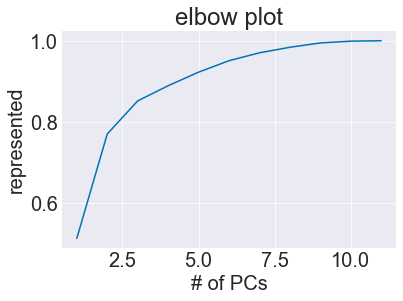

In [339]:
pca.elbow_plot()
plt.title('elbow plot')
plt.xlabel('# of PCs')
plt.ylabel('represented')
plt.show()

#### Answer: number of PCs preserved should be 2-4, becasue when 4+ PCs are preserved,  much less increase in the portion represented is presented.

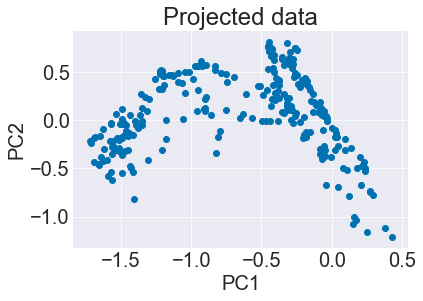

In [283]:
pcs_to_keep = [0, 1]
projected = pca.pca_project(pcs_to_keep)
x = projected[:,0]
y = projected[:,1]
plt.title('Projected data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x,y)
plt.show()

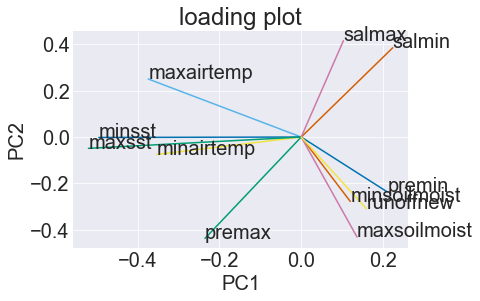

In [340]:
pca.loading_plot()
plt.title('loading plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- PC2 is positively associated with **salmax, salmin**
- PC2 is negatively associated with **maxsoilmoist, runoffnew, minsoilmoist, premin, premax**
- PC1 is negatively associated with **minsst, maxsst, minairtemp, maxairtemp**

- **minsst**, **maxsst**, **minairtemp** are positively correlated
- **minsoilmoist** and **runoffnew** are positively correlated
- **salmin** and **premax** are negatively correlated
- **maxairtemp** and **premin** are negatively correlated

### 2b) Other dataset PCA

**Make sure you describe what the dataset is, what variables are, where you got it.**

Include at minimum below:

- Elbow plot of cumulative variance accounted for by first $k$ principal components.
- Written description of your choice of number of PCs preserved and why.
- Visualization (plot) of PCA projected data on 1st two PCs.
- Loading plot (or heatmap for sections A/C) of the 1st two PCs. Interpret the meaning of each vector.

### Dataset: Heart Disease UCI.csv
- it is a dataset about heart disease and patients' physical examinations' data
- contains lots of attributes related to heart health condition(e.g. disease), physical conditions(e.g. resting blood pressure), as well as patients' ages.
- https://www.kaggle.com/ronitf/heart-disease-uci

In [305]:
# Other dataset

heart_data = pd.read_csv('data/heart.csv')
pca = pca_cov.PCA_COV(heart_data)
heart_headers = list(heart_data.columns[:-1])
pca.pca(heart_headers)

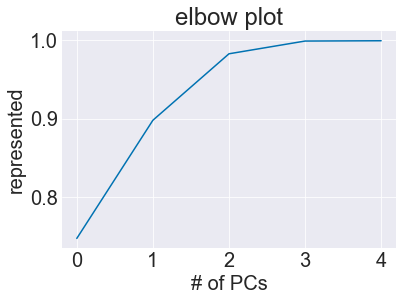

In [308]:
pca.elbow_plot(5)
plt.title('elbow plot')
plt.xlabel('# of PCs')
plt.ylabel('represented')
plt.show()

- I would keep 2PCs, because 2PCs already represent more than 98% of the data; after three or more PCs, there's barely significant increases in the proportion of data represented, meaning the first 2 PCs are the most significant ones.

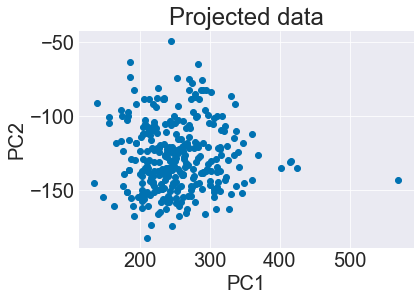

In [287]:
pcs_to_keep = [0, 1]
projected = pca.pca_project(pcs_to_keep)
x = projected[:,0]
y = projected[:,1]
plt.title('Projected data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x,y)
plt.show()

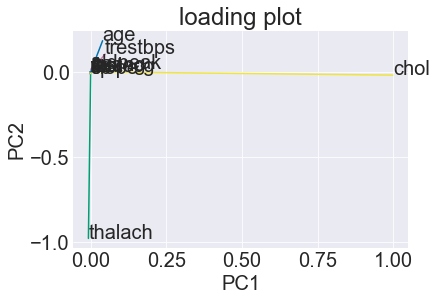

In [309]:
pca.loading_plot()
plt.title('loading plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- PC1 is is positively associated with chol (**serum cholestoral in mg/dl**)
- PC2 is negatively associated with thalach (**maximum heart rate achieved**)
- PC2 is positively associated with age
- **chol**(*serum cholestoral in mg/dl*) and **thalach**(*maximum heart rate achieved*) are NOT correlated
- **age** and **chol**(*serum cholestoral in mg/dl*) are NOT correlated
- Both **age** and **trestbps**(*resting electrocardiographic results*) are **negatively correlated** with thalach(*maximum heart rate achieved*)
- **age** and **trestbps**(*resting electrocardiographic results*) are **positively correlated**
- the relationships of the rest vectors from the graph are limited to tell (they might be positively correlated with chol)